Gezegenimsiler için çap tahmini
@yazar: Olca Orakcı

R^2 skoru: 0.9665626238* 

*BASU V. (2019). PREDICTION OF ASTEROID DIAMETER WITH THE HELP OF MULTI-LAYER PERCEPTRON REGRESSOR,
International Journal of Advances in Electronics and Computer Science, ISSN(p): 2394-2835 Volume-6,
Issue-4, Apr.-2019

# 1. Veri İşleme

## 1.1. Veri tanımı

In [1]:
## importing the data
import numpy as np
import pandas as pd
raw_data = pd.read_csv("C:/Users/olcao/Desktop/AOL Works/astreoid_diameter/Asteroid.csv") # 839,736 astreoids
print(raw_data)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                full_name         a         e     G          i          om  \
0                 1 Ceres  2.769165  0.076009  0.12  10.594067   80.305532   
1                2 Pallas  2.772466  0.230337  0.11  34.836234  173.080063   
2                  3 Juno  2.669150  0.256942  0.32  12.988919  169.852760   
3                 4 Vesta  2.361418  0.088721  0.32   7.141771  103.810804   
4               5 Astraea  2.574249  0.191095   NaN   5.366988  141.576604   
...                   ...       ...       ...   ...        ...         ...   
839731         (6344 P-L)  2.812945  0.664688   NaN   4.695700  183.310012   
839732         (1168 T-2)  2.645238  0.259376   NaN  12.574937    1.620020   
839733         (2060 T-2)  2.373137  0.202053   NaN   0.732484  176.499082   
839734         (2678 T-3)  2.260404  0.258348   NaN   9.661947  204.512448   
839735         (4571 T-3)  2.546442  0.287672   NaN   5.356238   70.709555   

                 w         q        ad     per_y  ...    rot_pe

## 1.2. Ayıklama 

In [2]:
## First step, will be deleting unwanted columns, this part requires some astronomy knowledge
# I will delete full_name,condition_code,neo,pha,moid
del raw_data['full_name'],raw_data['condition_code'],raw_data['neo'],raw_data['pha']

In [3]:
## First step, will be deleting rows with no diameter value
raw_data = raw_data[raw_data['diameter'].notna()] 
print(raw_data)

               a         e     G          i          om           w         q  \
0       2.769165  0.076009  0.12  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  0.11  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  0.32  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721  0.32   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   NaN   5.366988  141.576604  358.687608  2.082324   
...          ...       ...   ...        ...         ...         ...       ...   
797896  3.171225  0.159119   NaN  27.098625  309.036573   19.746812  2.666623   
798113  2.548410  0.076071   NaN  11.593237  246.298656  170.090810  2.354549   
798225  3.146246  0.220559   NaN  17.966646  137.981403  180.898833  2.452313   
799788  3.051336  0.287449   NaN  14.456779  343.917822  342.614839  2.174231   
810411  2.417477  0.109001   NaN   4.525668  148.244819   31.949854  2.153970   

              ad     per_y 

In [4]:
## Second step will be deleting mostly empty (unusable) rows
for i in raw_data.columns:
    if (raw_data[i].isna().sum() / raw_data.shape[0]) > 0.5:
        print(i, raw_data[i].isna().sum() / raw_data.shape[0] )

G 0.9991356832097384
extent 0.9998837893391245
rot_per 0.9187396953828052
GM 0.9998983156717339
BV 0.9927005178637576
UB 0.9929910445159463
IR 0.9999927368336953
spec_B 0.9900494621625351
spec_T 0.9929910445159463


In [5]:
del raw_data['G'],raw_data['extent'],raw_data['rot_per'],raw_data['GM'],
del raw_data['BV'],raw_data['UB'],raw_data['IR'],raw_data['spec_B'],raw_data['spec_T']
print(raw_data)

               a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576604  358.687608  2.082324   
...          ...       ...        ...         ...         ...       ...   
797896  3.171225  0.159119  27.098625  309.036573   19.746812  2.666623   
798113  2.548410  0.076071  11.593237  246.298656  170.090810  2.354549   
798225  3.146246  0.220559  17.966646  137.981403  180.898833  2.452313   
799788  3.051336  0.287449  14.456779  343.917822  342.614839  2.174231   
810411  2.417477  0.109001   4.525668  148.244819   31.949854  2.153970   

              ad     per_y  data_arc  n_obs_used      H diameter  albedo  \
0       2.979647  4.608

In [6]:
## Now we must check our column data types, all need to become float numbers for training
for i in raw_data.columns:
    print(i, raw_data[i].unique()[:10])

a [2.76916515 2.77246592 2.66914952 2.3614179  2.57424892 2.42515999
 2.38533381 2.20176419 2.38563654 3.14153918]
e [0.07600903 0.23033682 0.25694232 0.08872146 0.19109452 0.20300711
 0.23120579 0.15649925 0.12311427 0.11246066]
i [10.59406704 34.83623442 12.98891913  7.14177081  5.36698794 14.7379011
  5.52365139  5.88695456  5.57681551  3.83156003]
om [ 80.30553157 173.08006275 169.85275981 103.81080443 141.57660421
 138.64020276 259.56323069 110.88932989  68.9085767  283.20216686]
w [ 73.59769412 310.04885743 248.13862618 150.72854129 358.68760779
 239.80749023 145.26510583 285.28746222   6.41736923 312.31520625]
q [2.5586836  2.13386493 1.98333205 2.15190945 2.08232406 1.93283527
 1.83383082 1.85718974 2.09193063 2.78823962]
ad [2.97964671 3.41106691 3.35496699 2.57092634 3.06617378 2.91748471
 2.93683681 2.54633864 2.67934244 3.49483874]
per_y [4.6082018  4.61644353 4.36081392 3.62883714 4.13032295 3.77675484
 3.68410457 3.2671149  3.68480592 5.56829099]
data_arc [ 8822. 72318. 7

In [7]:
# Looks all good except diameter. We will start with diameter and condition_code
# altough we have numbers , they are in string form
raw_data['diameter'] = raw_data['diameter'].astype(float)
 


In [8]:
# We check again for any problems
for i in raw_data.columns:
    print(i, raw_data[i].unique()[:10])

a [2.76916515 2.77246592 2.66914952 2.3614179  2.57424892 2.42515999
 2.38533381 2.20176419 2.38563654 3.14153918]
e [0.07600903 0.23033682 0.25694232 0.08872146 0.19109452 0.20300711
 0.23120579 0.15649925 0.12311427 0.11246066]
i [10.59406704 34.83623442 12.98891913  7.14177081  5.36698794 14.7379011
  5.52365139  5.88695456  5.57681551  3.83156003]
om [ 80.30553157 173.08006275 169.85275981 103.81080443 141.57660421
 138.64020276 259.56323069 110.88932989  68.9085767  283.20216686]
w [ 73.59769412 310.04885743 248.13862618 150.72854129 358.68760779
 239.80749023 145.26510583 285.28746222   6.41736923 312.31520625]
q [2.5586836  2.13386493 1.98333205 2.15190945 2.08232406 1.93283527
 1.83383082 1.85718974 2.09193063 2.78823962]
ad [2.97964671 3.41106691 3.35496699 2.57092634 3.06617378 2.91748471
 2.93683681 2.54633864 2.67934244 3.49483874]
per_y [4.6082018  4.61644353 4.36081392 3.62883714 4.13032295 3.77675484
 3.68410457 3.2671149  3.68480592 5.56829099]
data_arc [ 8822. 72318. 7

In [9]:
## Finally we will delete any row with a nan value
raw_data = raw_data.astype(np.float32)
raw_data = raw_data.dropna(axis=0,how='any')


In [10]:
## Cheking our data for any faulties
raw_data.isna().values.any()

False

## 1.3. Görselleştirme

In [11]:
raw_data.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used',
       'H', 'diameter', 'albedo', 'moid'],
      dtype='object')

Text(0.5, 1.0, 'moid')

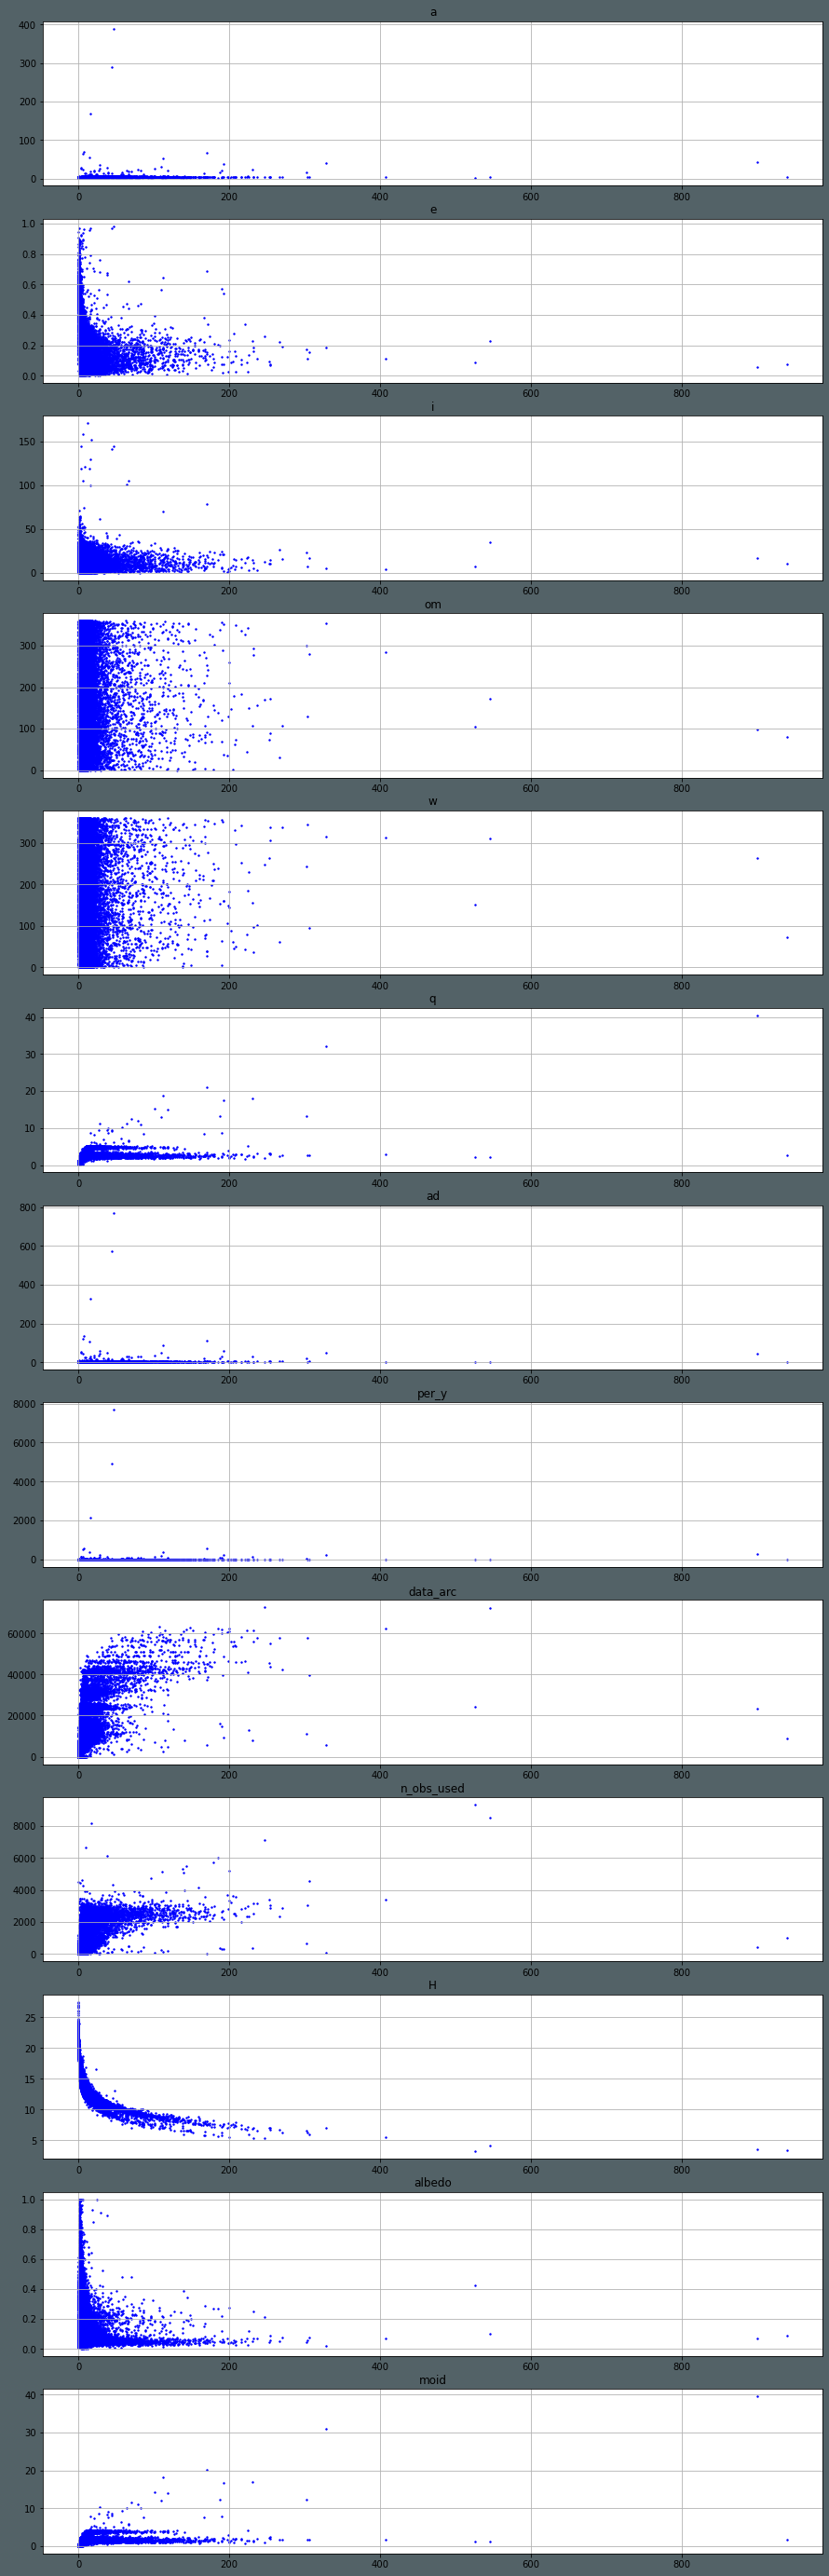

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13) = plt.subplots(nrows=13,ncols=1,
                                                                              figsize=(15,50))

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
fig.set_facecolor('xkcd:gunmetal')
ax1.scatter(raw_data['diameter'],raw_data['a'], s=2,c='#0000ff')
ax1.grid()
ax1.set_title('a')
ax2.scatter(raw_data['diameter'],raw_data['e'], s=2,c='#0000ff')
ax2.grid()
ax2.set_title('e')
ax3.scatter(raw_data['diameter'],raw_data['i'], s=2,c='#0000ff')
ax3.grid()
ax3.set_title('i')
ax4.scatter(raw_data['diameter'],raw_data['om'], s=2,c='#0000ff')
ax4.grid()
ax4.set_title('om')
ax5.scatter(raw_data['diameter'],raw_data['w'], s=2,c='#0000ff')
ax5.grid()
ax5.set_title('w')
ax6.scatter(raw_data['diameter'],raw_data['q'], s=2,c='#0000ff')
ax6.grid()
ax6.set_title('q')
ax7.scatter(raw_data['diameter'],raw_data['ad'], s=2,c='#0000ff')
ax7.grid()
ax7.set_title('ad')
ax8.scatter(raw_data['diameter'],raw_data['per_y'], s=2,c='#0000ff')
ax8.grid()
ax8.set_title('per_y')
ax9.scatter(raw_data['diameter'],raw_data['data_arc'], s=2,c='#0000ff')
ax9.grid()
ax9.set_title('data_arc')
ax10.scatter(raw_data['diameter'],raw_data['n_obs_used'], s=2,c='#0000ff')
ax10.grid()
ax10.set_title('n_obs_used')
ax11.scatter(raw_data['diameter'],raw_data['H'], s=2,c='#0000ff')
ax11.grid()
ax11.set_title('H')
ax12.scatter(raw_data['diameter'],raw_data['albedo'], s=2,c='#0000ff')
ax12.grid()
ax12.set_title('albedo')
ax13.scatter(raw_data['diameter'],raw_data['moid'], s=2,c='#0000ff')
ax13.grid()
ax13.set_title('moid')


## 1.4. Özellik çıkarımı

In [13]:
## Now we will use our physics knowledge to gain some edge, we know that in most calculations, we use 
#  exponentials and logarithms of our parameters to calculate other properties. No one is stopping us from
#  creating those ourselves. However since some most of the colums have high values exponential columns 
#  would create a lot of infinity problems, so lets not use them for this problem.
for i in raw_data.columns.drop(['diameter']):
    raw_data['log('+i+')']=raw_data[i].apply(np.log)
    #raw_data['exp('+i+')']=raw_data[i].apply(np.exp)

In [14]:
print(raw_data)

               a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305534   73.597694  2.558684   
1       2.772466  0.230337  34.836235  173.080063  310.048859  2.133865   
2       2.669149  0.256942  12.988919  169.852753  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810806  150.728546  2.151909   
4       2.574249  0.191095   5.366988  141.576599  358.687622  2.082324   
...          ...       ...        ...         ...         ...       ...   
797871  3.155975  0.430349  28.718353  115.532997  136.849396  1.797805   
797896  3.171225  0.159119  27.098625  309.036560   19.746811  2.666623   
798113  2.548409  0.076071  11.593237  246.298660  170.090805  2.354549   
799788  3.051336  0.287449  14.456779  343.917816  342.614838  2.174231   
810411  2.417477  0.109001   4.525668  148.244812   31.949854  2.153970   

              ad     per_y  data_arc  n_obs_used  ...   log(om)    log(w)  \
0       2.979647  4.60

In [15]:
raw_data.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used',
       'H', 'diameter', 'albedo', 'moid', 'log(a)', 'log(e)', 'log(i)',
       'log(om)', 'log(w)', 'log(q)', 'log(ad)', 'log(per_y)', 'log(data_arc)',
       'log(n_obs_used)', 'log(H)', 'log(albedo)', 'log(moid)'],
      dtype='object')

Text(0.5, 1.0, 'log(moid)')

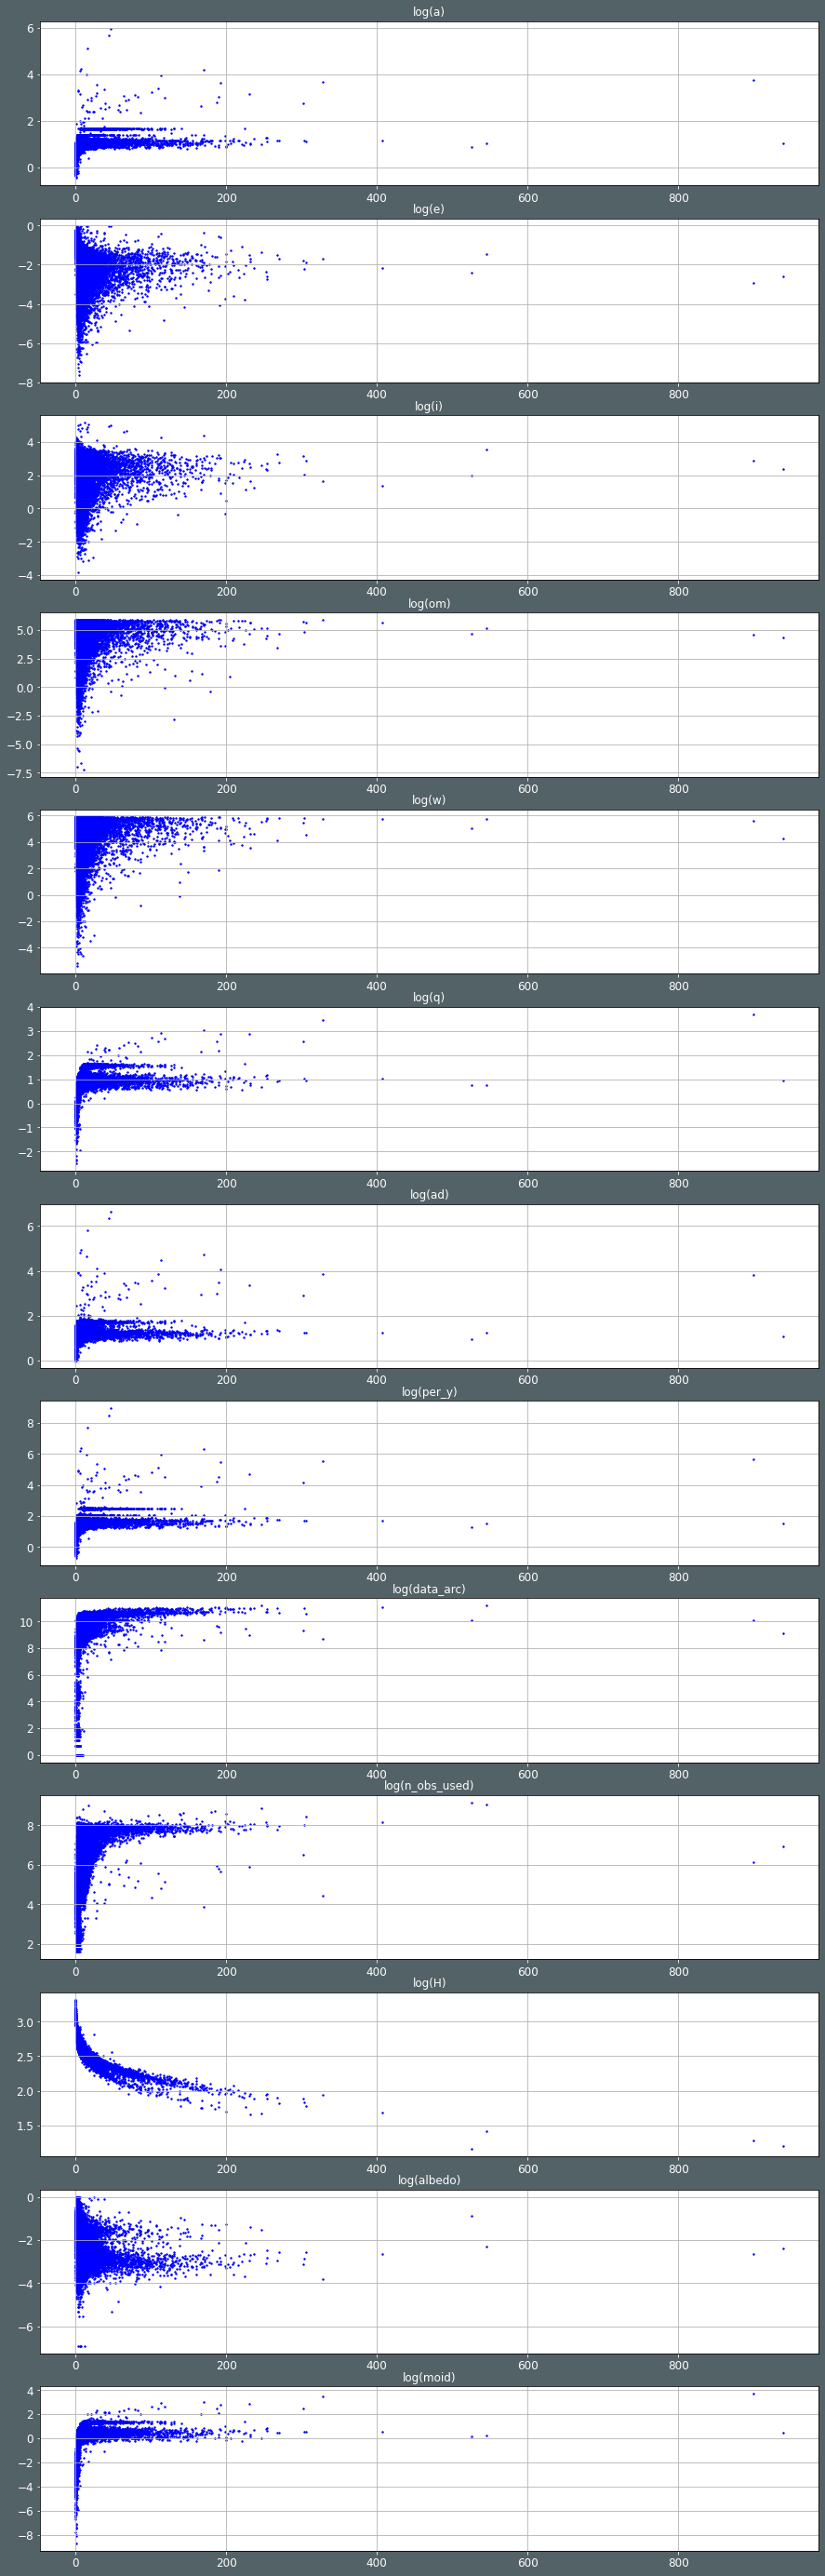

In [16]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13) = plt.subplots(nrows=13,ncols=1,
                                                                              figsize=(15,50))

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
fig.set_facecolor('xkcd:gunmetal')
ax1.scatter(raw_data['diameter'],raw_data['log(a)'], s=2,c='#0000ff')
ax1.grid()
ax1.set_title('log(a)')
ax2.scatter(raw_data['diameter'],raw_data['log(e)'], s=2,c='#0000ff')
ax2.grid()
ax2.set_title('log(e)')
ax3.scatter(raw_data['diameter'],raw_data['log(i)'], s=2,c='#0000ff')
ax3.grid()
ax3.set_title('log(i)')
ax4.scatter(raw_data['diameter'],raw_data['log(om)'], s=2,c='#0000ff')
ax4.grid()
ax4.set_title('log(om)')
ax5.scatter(raw_data['diameter'],raw_data['log(w)'], s=2,c='#0000ff')
ax5.grid()
ax5.set_title('log(w)')
ax6.scatter(raw_data['diameter'],raw_data['log(q)'], s=2,c='#0000ff')
ax6.grid()
ax6.set_title('log(q)')
ax7.scatter(raw_data['diameter'],raw_data['log(ad)'], s=2,c='#0000ff')
ax7.grid()
ax7.set_title('log(ad)')
ax8.scatter(raw_data['diameter'],raw_data['log(per_y)'], s=2,c='#0000ff')
ax8.grid()
ax8.set_title('log(per_y)')
ax9.scatter(raw_data['diameter'],raw_data['log(data_arc)'], s=2,c='#0000ff')
ax9.grid()
ax9.set_title('log(data_arc)')
ax10.scatter(raw_data['diameter'],raw_data['log(n_obs_used)'], s=2,c='#0000ff')
ax10.grid()
ax10.set_title('log(n_obs_used)')
ax11.scatter(raw_data['diameter'],raw_data['log(H)'], s=2,c='#0000ff')
ax11.grid()
ax11.set_title('log(H)')
ax12.scatter(raw_data['diameter'],raw_data['log(albedo)'], s=2,c='#0000ff')
ax12.grid()
ax12.set_title('log(albedo)')
ax13.scatter(raw_data['diameter'],raw_data['log(moid)'], s=2,c='#0000ff')
ax13.grid()
ax13.set_title('log(moid)')

## 1.5. Eğitim seti oluşturma

In [23]:
## First, lets create our labels 
Y = raw_data['diameter'].values


In [24]:
feature_data = raw_data
del feature_data['diameter']

In [31]:
## Then create our training data
X = feature_data.values
print(X.shape,Y.shape)

(136044, 26) (136044,)


In [36]:
## Now we can save our data just in case
np.save('X.npy',X)
np.save('Y.npy',Y)


In [1]:
import numpy as np
X = np.load('X.npy')
Y = np.load('Y.npy')

In [65]:
X.shape

(136044, 26)

In [2]:
## We need to split our data for final performance testing
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=7)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(95230, 26) (95230,) (40814, 26) (40814,)


In [3]:
## We will create a normalized extra data set and try it alongside our main data set
from sklearn.preprocessing import StandardScaler

X_train2 = StandardScaler().fit(X_train).fit_transform(X_train)
X_val2 = StandardScaler().fit(X_train).fit_transform(X_val)

# 2. Model Eğitimi

## 2.1 Ölçüm tipi seçimi

In [5]:
from sklearn.metrics import r2_score
scores= []
models= []

## 2.2 Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
## fit_intercept: Kesme noktası hesabınının modelde kullanımı
## normalize: Verinin normalize edilip edilmeyeceği
scores_lr=[]
for i in [True,False]:
    for j in [True,False]:
        lr_model = LinearRegression(fit_intercept=i, normalize=j, copy_X=True, n_jobs=-1)
        lr_model.fit(X_train,Y_train)
        Y_pred_lr = lr_model.predict(X_val)
        lr_score = r2_score(Y_pred_lr,Y_val)
        scores_lr.append(lr_score)
        print('i:'+str(i),'j:'+str(j),'score:'+str(lr_score))
        print('Best score:'+str(max(scores_lr)))

i:True j:True score:0.7847628364604243
Best score:0.7847628364604243
i:True j:False score:0.785911434308936
Best score:0.785911434308936
i:False j:True score:0.2735032494815116
Best score:0.785911434308936
i:False j:False score:0.2735032494815116
Best score:0.785911434308936


In [9]:
scores_lr2=[]
for i in [True,False]:
    for j in [True,False]:
        lr_model2 = LinearRegression(fit_intercept=i, normalize=j, copy_X=True, n_jobs=-1)
        lr_model2.fit(X_train2,Y_train)
        Y_pred_lr2 = lr_model2.predict(X_val2)
        lr_score2 = r2_score(Y_pred_lr2,Y_val)
        scores_lr2.append(lr_score2)
        print('i:'+str(i),'j:'+str(j),'score:'+str(lr_score2))
        print('Best score:'+str(max(scores_lr2)))

i:True j:True score:-0.00011142698567723208
Best score:-0.00011142698567723208
i:True j:False score:0.7813259541456667
Best score:0.7813259541456667
i:False j:True score:0.4206222850822541
Best score:0.7813259541456667
i:False j:False score:0.4206222850822541
Best score:0.7813259541456667


In [36]:
models.append('Linear Regression')
scores.append(max(scores_lr))

## 2.3 Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
## criterion: Veri ayrımının kalitesini denetleyen fonksiyon
## splitter: Düğümlerde verilerin ayrımın methodu
## max_depth: Karar ağacının maksimum derinliği
## min_samples_split: Ağaç dallına ayrılmak için gerekli minimum veri
## min_samples_leaf: Ağaç yapraklarına ayrılmak için gerekli minimum veri
scores_dt =[]
for i in ['mse', 'friedman_mse']:
    for j in ['best','random']:
        for k in [10,100,1000,None]:
            for l in [2,3,4,5]:
                for m in [1,2,3]:        
                    dt_model = DecisionTreeRegressor(criterion=i, splitter=j, max_depth=k,
                                                     min_samples_split=l, min_samples_leaf=m,
                                                     min_weight_fraction_leaf=0.0, max_features=None,
                                                     random_state=None, max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                                     presort='deprecated', ccp_alpha=0.0)
                    dt_model.fit(X_train,Y_train)
                    Y_pred_dt = dt_model.predict(X_val)
                    dt_score = r2_score(Y_pred_dt,Y_val)
                    scores_dt.append(dt_score)
                    print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),
                          'm:'+str(m),'score:'+str(dt_score))
print('Best score:'+str(max(scores_dt)))

i:mse j:best k:10 l:2 m:1 score:0.9778122358268398
i:mse j:best k:10 l:2 m:2 score:0.9494292417230159
i:mse j:best k:10 l:2 m:3 score:0.9463048535451529
i:mse j:best k:10 l:3 m:1 score:0.8978821859256108
i:mse j:best k:10 l:3 m:2 score:0.946569472892181
i:mse j:best k:10 l:3 m:3 score:0.9465288281791298
i:mse j:best k:10 l:4 m:1 score:0.9496324551790125
i:mse j:best k:10 l:4 m:2 score:0.9458121694963809
i:mse j:best k:10 l:4 m:3 score:0.9466213717080993
i:mse j:best k:10 l:5 m:1 score:0.9467393571531432
i:mse j:best k:10 l:5 m:2 score:0.9480391214441426
i:mse j:best k:10 l:5 m:3 score:0.9467599175479934
i:mse j:best k:100 l:2 m:1 score:0.8887224902140805
i:mse j:best k:100 l:2 m:2 score:0.9459471260492226
i:mse j:best k:100 l:2 m:3 score:0.9453885469433266
i:mse j:best k:100 l:3 m:1 score:0.9765739147755711
i:mse j:best k:100 l:3 m:2 score:0.944220237884288
i:mse j:best k:100 l:3 m:3 score:0.9447593527204357
i:mse j:best k:100 l:4 m:1 score:0.9452462732925947
i:mse j:best k:100 l:4 m:2

i:friedman_mse j:random k:10 l:3 m:1 score:0.9735745822447724
i:friedman_mse j:random k:10 l:3 m:2 score:0.9463192145274604
i:friedman_mse j:random k:10 l:3 m:3 score:0.9402661635518766
i:friedman_mse j:random k:10 l:4 m:1 score:0.9352616940028543
i:friedman_mse j:random k:10 l:4 m:2 score:0.7792421203150823
i:friedman_mse j:random k:10 l:4 m:3 score:0.7141769895545927
i:friedman_mse j:random k:10 l:5 m:1 score:0.9506409891452624
i:friedman_mse j:random k:10 l:5 m:2 score:0.9347441277624138
i:friedman_mse j:random k:10 l:5 m:3 score:0.869225381287656
i:friedman_mse j:random k:100 l:2 m:1 score:0.9650035227444334
i:friedman_mse j:random k:100 l:2 m:2 score:0.9535885760382571
i:friedman_mse j:random k:100 l:2 m:3 score:0.9463161720716132
i:friedman_mse j:random k:100 l:3 m:1 score:0.9614199620364515
i:friedman_mse j:random k:100 l:3 m:2 score:0.9445127298320568
i:friedman_mse j:random k:100 l:3 m:3 score:0.9490462853437224
i:friedman_mse j:random k:100 l:4 m:1 score:0.9688141277347704
i:

In [11]:
scores_dt2 =[]
for i in ['mse', 'friedman_mse']:
    for j in ['best','random']:
        for k in [10,100,1000,None]:
            for l in [2,3,4,5]:
                for m in [1,2,3]:        
                    dt_model2 = DecisionTreeRegressor(criterion=i, splitter=j, max_depth=k,
                                                     min_samples_split=l, min_samples_leaf=m,
                                                     min_weight_fraction_leaf=0.0, max_features=None,
                                                     random_state=None, max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                                     presort='deprecated', ccp_alpha=0.0)
                    dt_model2.fit(X_train2,Y_train)
                    Y_pred_dt2 = dt_model2.predict(X_val2)
                    dt_score2 = r2_score(Y_pred_dt2,Y_val)
                    scores_dt2.append(dt_score2)
                    print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),
                          'm:'+str(m),'score:'+str(dt_score2))
print('Best score:'+str(max(scores_dt2)))

i:mse j:best k:10 l:2 m:1 score:0.9763368516104638
i:mse j:best k:10 l:2 m:2 score:0.9466059303122523
i:mse j:best k:10 l:2 m:3 score:0.9474640019275472
i:mse j:best k:10 l:3 m:1 score:0.9011076332776958
i:mse j:best k:10 l:3 m:2 score:0.947356880901288
i:mse j:best k:10 l:3 m:3 score:0.9469877971549233
i:mse j:best k:10 l:4 m:1 score:0.9477043615955407
i:mse j:best k:10 l:4 m:2 score:0.9484339140159959
i:mse j:best k:10 l:4 m:3 score:0.9476205108833662
i:mse j:best k:10 l:5 m:1 score:0.9486163517621155
i:mse j:best k:10 l:5 m:2 score:0.948363978245994
i:mse j:best k:10 l:5 m:3 score:0.9471847480545453
i:mse j:best k:100 l:2 m:1 score:0.9734785389157538
i:mse j:best k:100 l:2 m:2 score:0.9436355588251271
i:mse j:best k:100 l:2 m:3 score:0.9449200516541973
i:mse j:best k:100 l:3 m:1 score:0.8934838970678701
i:mse j:best k:100 l:3 m:2 score:0.9451498138813388
i:mse j:best k:100 l:3 m:3 score:0.9458928911674667
i:mse j:best k:100 l:4 m:1 score:0.9398184763468428
i:mse j:best k:100 l:4 m:2

i:friedman_mse j:random k:10 l:3 m:1 score:0.7843637272051721
i:friedman_mse j:random k:10 l:3 m:2 score:0.9362152039108599
i:friedman_mse j:random k:10 l:3 m:3 score:0.9396093894417649
i:friedman_mse j:random k:10 l:4 m:1 score:0.6646192096814081
i:friedman_mse j:random k:10 l:4 m:2 score:0.9333559271175977
i:friedman_mse j:random k:10 l:4 m:3 score:0.9415030935462356
i:friedman_mse j:random k:10 l:5 m:1 score:0.8677115194451516
i:friedman_mse j:random k:10 l:5 m:2 score:0.8601062636222457
i:friedman_mse j:random k:10 l:5 m:3 score:0.9374739499206695
i:friedman_mse j:random k:100 l:2 m:1 score:0.8802020430889242
i:friedman_mse j:random k:100 l:2 m:2 score:0.905581853662726
i:friedman_mse j:random k:100 l:2 m:3 score:0.9477957965300395
i:friedman_mse j:random k:100 l:3 m:1 score:0.6878949709778521
i:friedman_mse j:random k:100 l:3 m:2 score:0.9570463999647608
i:friedman_mse j:random k:100 l:3 m:3 score:0.8317412792367666
i:friedman_mse j:random k:100 l:4 m:1 score:0.9394638886625891
i:

In [37]:
models.append('Decision Tree')
scores.append(max(scores_dt))

## 2.4. K-Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsRegressor
## n_neighbors: Modelin sorgulamada kullanacağı komşu sayısı
## weights: Modeli oluştururken verilerin uzaklık ağırlığı
## leaf_size: Algoritmanın (ağaç) kullanacağı yaprak boyutu
## p: Ölçüm için kullanılacak fonksiyonun kuvvet parametresi
scores_kn= []
for i in [1,2,3,4,5]:
    for j in ['uniform','distance']:
        for k in [5,10,20,30,40,50]:
            for l in [1,2]:
                kn_model = KNeighborsRegressor(n_neighbors=i, weights=j, algorithm='auto',
                                               leaf_size=k, p=l, metric='minkowski', metric_params=None,
                                               n_jobs=-1)
                kn_model.fit(X_train,Y_train)
                Y_pred_kn = kn_model.predict(X_val)
                kn_score = r2_score(Y_pred_kn,Y_val)
                scores_kn.append(kn_score)
                print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),'score:'+str(kn_score))
print('Best score:'+str(max(scores_kn)))

i:1 j:uniform k:5 l:1 score:-0.3662367609992452
i:1 j:uniform k:5 l:2 score:-0.31771942561014255
i:1 j:uniform k:10 l:1 score:-0.3662367609992452
i:1 j:uniform k:10 l:2 score:-0.31771942561014255
i:1 j:uniform k:20 l:1 score:-0.3662367609992452
i:1 j:uniform k:20 l:2 score:-0.31771942561014255
i:1 j:uniform k:30 l:1 score:-0.3662367609992452
i:1 j:uniform k:30 l:2 score:-0.31771942561014255
i:1 j:uniform k:40 l:1 score:-0.3662367609992452
i:1 j:uniform k:40 l:2 score:-0.31771942561014255
i:1 j:uniform k:50 l:1 score:-0.3662367609992452
i:1 j:uniform k:50 l:2 score:-0.31771942561014255
i:1 j:distance k:5 l:1 score:-0.36623679965758926
i:1 j:distance k:5 l:2 score:-0.3177194658644169
i:1 j:distance k:10 l:1 score:-0.36623679965758926
i:1 j:distance k:10 l:2 score:-0.3177194658644169
i:1 j:distance k:20 l:1 score:-0.36623679965758926
i:1 j:distance k:20 l:2 score:-0.3177194658644169
i:1 j:distance k:30 l:1 score:-0.36623679965758926
i:1 j:distance k:30 l:2 score:-0.3177194658644169
i:1 j:

In [7]:
from sklearn.neighbors import KNeighborsRegressor
scores_kn2= []
for i in [1,2,3,4,5]:
    for j in ['uniform','distance']:
        for k in [5,10,20,30,40,50]:
            for l in [1,2]:
                kn_model2 = KNeighborsRegressor(n_neighbors=i, weights=j, algorithm='auto',
                                               leaf_size=k, p=l, metric='minkowski', metric_params=None,
                                               n_jobs=-1)
                kn_model2.fit(X_train2,Y_train)
                Y_pred_kn2 = kn_model2.predict(X_val2)
                kn_score2 = r2_score(Y_pred_kn2,Y_val)
                scores_kn2.append(kn_score2)
                print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),'score:'+str(kn_score2))
print('Best score:'+str(max(scores_kn2)))

i:1 j:uniform k:5 l:1 score:0.6547641131575266
i:1 j:uniform k:5 l:2 score:0.5295643079843313
i:1 j:uniform k:10 l:1 score:0.6547641131575266
i:1 j:uniform k:10 l:2 score:0.5295643079843313
i:1 j:uniform k:20 l:1 score:0.6547641131575266
i:1 j:uniform k:20 l:2 score:0.5295643079843313
i:1 j:uniform k:30 l:1 score:0.6547641131575266
i:1 j:uniform k:30 l:2 score:0.5295643079843313
i:1 j:uniform k:40 l:1 score:0.6547641131575266
i:1 j:uniform k:40 l:2 score:0.5295643079843313
i:1 j:uniform k:50 l:1 score:0.6547641131575266
i:1 j:uniform k:50 l:2 score:0.5295643079843313
i:1 j:distance k:5 l:1 score:0.654764118012974
i:1 j:distance k:5 l:2 score:0.5295643151991174
i:1 j:distance k:10 l:1 score:0.654764118012974
i:1 j:distance k:10 l:2 score:0.5295643151991174
i:1 j:distance k:20 l:1 score:0.654764118012974
i:1 j:distance k:20 l:2 score:0.5295643151991174
i:1 j:distance k:30 l:1 score:0.654764118012974
i:1 j:distance k:30 l:2 score:0.5295643151991174
i:1 j:distance k:40 l:1 score:0.65476411

In [38]:
models.append('K-Nearest Neighbours')
scores.append(max(scores_kn2))

## 2.5. Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
## n_estimators: Paralel kullanılacak ağaç sayısı
## max_depth: Karar ağacının maksimum derinliği
## min_samples_split: Ağaç dallına ayrılmak için gerekli minimum veri
## min_samples_leaf: Ağaç yapraklarına ayrılmak için gerekli minimum veri
scores_rf= []
for i in [10,25,50,100,150]:
    for j in [10,100,1000,None]:
        for k in [2,3,4,5]:
            for l in [1,2,3]:
                rf_model = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j,
                                                 min_samples_split=k, min_samples_leaf=l,
                                                 min_weight_fraction_leaf=0.0, max_features='auto',
                                                 max_leaf_nodes=None, min_impurity_decrease=0.0,
                                                 min_impurity_split=None, bootstrap=True,
                                                 oob_score=False, n_jobs=-1, random_state=None,
                                                 verbose=0, warm_start=False, ccp_alpha=0.0,
                                                 max_samples=None)
                rf_model.fit(X_train,Y_train)
                Y_pred_rf = rf_model.predict(X_val)
                rf_score = r2_score(Y_pred_rf,Y_val)
                scores_rf.append(rf_score)
                print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),'score:'+str(rf_score))
print('Best score:'+str(max(scores_rf)))

i:10 j:10 k:2 l:1 score:0.9642542555849318
i:10 j:10 k:2 l:2 score:0.8585062946479478
i:10 j:10 k:2 l:3 score:0.8813335366242103
i:10 j:10 k:3 l:1 score:0.9611929399826398
i:10 j:10 k:3 l:2 score:0.8488486833201249
i:10 j:10 k:3 l:3 score:0.835872083578161
i:10 j:10 k:4 l:1 score:0.9430698135561077
i:10 j:10 k:4 l:2 score:0.9588977662461068
i:10 j:10 k:4 l:3 score:0.8899229420895343
i:10 j:10 k:5 l:1 score:0.942226522989258
i:10 j:10 k:5 l:2 score:0.8896278519787417
i:10 j:10 k:5 l:3 score:0.8781006184362775
i:10 j:100 k:2 l:1 score:0.919633327268524
i:10 j:100 k:2 l:2 score:0.8714067703279247
i:10 j:100 k:2 l:3 score:0.8426600406360137
i:10 j:100 k:3 l:1 score:0.9676019160089305
i:10 j:100 k:3 l:2 score:0.9223582615001733
i:10 j:100 k:3 l:3 score:0.8583292678649875
i:10 j:100 k:4 l:1 score:0.9295372056294995
i:10 j:100 k:4 l:2 score:0.9025871059855829
i:10 j:100 k:4 l:3 score:0.9211312799656172
i:10 j:100 k:5 l:1 score:0.887246844657513
i:10 j:100 k:5 l:2 score:0.9476201110458335
i:10

i:100 j:None k:3 l:3 score:0.8750450186992522
i:100 j:None k:4 l:1 score:0.9372883870635197
i:100 j:None k:4 l:2 score:0.9173158182814657
i:100 j:None k:4 l:3 score:0.8775103620777224
i:100 j:None k:5 l:1 score:0.9371487466853089
i:100 j:None k:5 l:2 score:0.9100686952781145
i:100 j:None k:5 l:3 score:0.8937647280667513
i:150 j:10 k:2 l:1 score:0.9533923064472017
i:150 j:10 k:2 l:2 score:0.925769569525714
i:150 j:10 k:2 l:3 score:0.8771624288990646
i:150 j:10 k:3 l:1 score:0.9361167942678107
i:150 j:10 k:3 l:2 score:0.8988001300085129
i:150 j:10 k:3 l:3 score:0.8750896722376406
i:150 j:10 k:4 l:1 score:0.9480189924089848
i:150 j:10 k:4 l:2 score:0.9046399634491336
i:150 j:10 k:4 l:3 score:0.8877063322698197
i:150 j:10 k:5 l:1 score:0.9332036886604652
i:150 j:10 k:5 l:2 score:0.9104954905863584
i:150 j:10 k:5 l:3 score:0.8692859282927443
i:150 j:100 k:2 l:1 score:0.9475462465643344
i:150 j:100 k:2 l:2 score:0.9243144247508092
i:150 j:100 k:2 l:3 score:0.8762387654071386
i:150 j:100 k:3 

In [9]:
from sklearn.ensemble import RandomForestRegressor
scores_rf2= []
for i in [10,25,50,100,150]:
    for j in [10,100,1000,None]:
        for k in [2,3,4,5]:
            for l in [1,2,3]:
                rf_model2 = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j,
                                                 min_samples_split=k, min_samples_leaf=l,
                                                 min_weight_fraction_leaf=0.0, max_features='auto',
                                                 max_leaf_nodes=None, min_impurity_decrease=0.0,
                                                 min_impurity_split=None, bootstrap=True,
                                                 oob_score=False, n_jobs=-1, random_state=None,
                                                 verbose=0, warm_start=False, ccp_alpha=0.0,
                                                 max_samples=None)
                rf_model2.fit(X_train,Y_train)
                Y_pred_rf2 = rf_model2.predict(X_val2)
                rf_score2 = r2_score(Y_pred_rf2,Y_val)
                scores_rf2.append(rf_score2)
                print('i:'+str(i),'j:'+str(j),'k:'+str(k),'l:'+str(l),'score:'+str(rf_score2))
print('Best score:'+str(max(scores_rf2)))

i:10 j:10 k:2 l:1 score:-157.08107065788425
i:10 j:10 k:2 l:2 score:-419.5261939705142
i:10 j:10 k:2 l:3 score:-262.7875450156269
i:10 j:10 k:3 l:1 score:-187.9712094579643
i:10 j:10 k:3 l:2 score:-149.4397603674704
i:10 j:10 k:3 l:3 score:-591.708346305329
i:10 j:10 k:4 l:1 score:-146.65600478756988
i:10 j:10 k:4 l:2 score:-365.8599553931262
i:10 j:10 k:4 l:3 score:-603.3558243968378
i:10 j:10 k:5 l:1 score:-246.79549244107093
i:10 j:10 k:5 l:2 score:-149.57976188843648
i:10 j:10 k:5 l:3 score:-534.3576187724126
i:10 j:100 k:2 l:1 score:-106.57286056572052
i:10 j:100 k:2 l:2 score:-368.1268652967167
i:10 j:100 k:2 l:3 score:-377.26788772560286
i:10 j:100 k:3 l:1 score:-289.65303138470273
i:10 j:100 k:3 l:2 score:-369.49399754087574
i:10 j:100 k:3 l:3 score:-209.78118816349811
i:10 j:100 k:4 l:1 score:-261.30092028185163
i:10 j:100 k:4 l:2 score:-303.0669826376781
i:10 j:100 k:4 l:3 score:-397.1833184897998
i:10 j:100 k:5 l:1 score:-140.12637269610815
i:10 j:100 k:5 l:2 score:-136.1427

KeyboardInterrupt: 

In [40]:
models.append('Random Forest')
scores.append(max(scores_rf))

## 2.6. Xgboost

In [7]:
from xgboost import XGBRegressor 
## learning_rate: Eğitimde kullanılacak adım büyüklüğü
## gamma: Yaprak yaratımı için gerekli minimum loss fonksiyonu azalımı
## max_depth: Karar ağacının maksimum derinliği

scores_xgb=[]
for i in [0.05,0.15,0.30]:
    for j in [5,10,15,20,25]:
        for k in [0.0,0.1,0.2,0.3,0.4]:
            xgb_model = XGBRegressor(objective ='reg:squarederror', 
                                     learning_rate = i ,min_child_weight= 1, gamma= k,
                                     colsample_bytree=0.7 ,max_depth = j, n_estimators = 500)
            xgb_model.fit(X_train,Y_train)
            Y_pred_xgb = xgb_model.predict(X_val)
            xgb_score = r2_score(Y_pred_xgb,Y_val)
            scores_xgb.append(xgb_score)
            print('i:'+str(i),'j:'+str(j),'k:'+str(k),'score:'+str(xgb_score))
print('Best score:'+str(max(scores_xgb)))

i:0.05 j:5 k:0.0 score:0.9865128991557616
i:0.05 j:5 k:0.1 score:0.986352097765209
i:0.05 j:5 k:0.2 score:0.9864361306237156
i:0.05 j:5 k:0.3 score:0.986590413886652
i:0.05 j:5 k:0.4 score:0.9864946749073551
i:0.05 j:10 k:0.0 score:0.9776155583141368
i:0.05 j:10 k:0.1 score:0.9777436221438988
i:0.05 j:10 k:0.2 score:0.977623724096715
i:0.05 j:10 k:0.3 score:0.9780841211813643
i:0.05 j:10 k:0.4 score:0.9774601968830139
i:0.05 j:15 k:0.0 score:0.9760919670197405
i:0.05 j:15 k:0.1 score:0.9760092514381804
i:0.05 j:15 k:0.2 score:0.9760837328776859
i:0.05 j:15 k:0.3 score:0.9764290213264879
i:0.05 j:15 k:0.4 score:0.9761608590523032
i:0.05 j:20 k:0.0 score:0.9760318626134178
i:0.05 j:20 k:0.1 score:0.9759293537723986
i:0.05 j:20 k:0.2 score:0.9759644266323465
i:0.05 j:20 k:0.3 score:0.9757395764646436
i:0.05 j:20 k:0.4 score:0.9760107384418212
i:0.05 j:25 k:0.0 score:0.976169634168009
i:0.05 j:25 k:0.1 score:0.9759247200997645
i:0.05 j:25 k:0.2 score:0.9756024361095089
i:0.05 j:25 k:0.3 sc

In [8]:
scores_xgb2=[]
for i in [0.05,0.15,0.30]:
    for j in [5,10,15,20,25]:
        for k in [0.0,0.1,0.2,0.3,0.4]:
            xgb_model2 = XGBRegressor(objective ='reg:squarederror', 
                                     learning_rate = i ,min_child_weight= 1, gamma= k,
                                     colsample_bytree=0.7 ,max_depth = j, n_estimators = 500)
            xgb_model2.fit(X_train2,Y_train)
            Y_pred_xgb2 = xgb_model2.predict(X_val2)
            xgb_score2 = r2_score(Y_pred_xgb2,Y_val)
            scores_xgb2.append(xgb_score2)
            print('i:'+str(i),'j:'+str(j),'k:'+str(k),'score:'+str(xgb_score2))
print('Best score:'+str(max(scores_xgb2)))

i:0.05 j:5 k:0.0 score:0.9849097338928319
i:0.05 j:5 k:0.1 score:0.9846815882884125
i:0.05 j:5 k:0.2 score:0.984903570314061
i:0.05 j:5 k:0.3 score:0.9851504862559713
i:0.05 j:5 k:0.4 score:0.9849369590356951
i:0.05 j:10 k:0.0 score:0.9771887345642607
i:0.05 j:10 k:0.1 score:0.977122529689667
i:0.05 j:10 k:0.2 score:0.9772661086696739
i:0.05 j:10 k:0.3 score:0.9777094740535013
i:0.05 j:10 k:0.4 score:0.9766597228649989
i:0.05 j:15 k:0.0 score:0.9744892705511572
i:0.05 j:15 k:0.1 score:0.9751307316515984
i:0.05 j:15 k:0.2 score:0.9752186324521799
i:0.05 j:15 k:0.3 score:0.9752104901535471
i:0.05 j:15 k:0.4 score:0.9752597944709666
i:0.05 j:20 k:0.0 score:0.9742751269653647
i:0.05 j:20 k:0.1 score:0.9746502704232006
i:0.05 j:20 k:0.2 score:0.9745495728562514
i:0.05 j:20 k:0.3 score:0.9745099823061409
i:0.05 j:20 k:0.4 score:0.9751474228996758
i:0.05 j:25 k:0.0 score:0.9741746286127246
i:0.05 j:25 k:0.1 score:0.9745201757512693
i:0.05 j:25 k:0.2 score:0.9744584235105583
i:0.05 j:25 k:0.3 

In [41]:
models.append('Xgboost')
scores.append(max(scores_xgb))

## 2.7. Neural Network Regression

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

## Neuron unit: Katmanlarda kullanılacak yapay nöron sayısı
## Activation function: Katmanda çıkacak veriyi haritalayan fonksiyon
## Layer amount: Tam bağlantılı katman sayısı
## Dropout: Modelde ezberi önlemek için katmanlarda rastgele devre dışı bırakılacak nöron oranı
## Optimizer: Tahminlerdeki hata oranını azaltmak için, nöronlardaki parametrelerin optimizasyon methodu
scores_nn =[]
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=200,verbose=0,
                                mode='min',min_delta=0.0001,cooldown=0,min_lr=0)
for i in [16,32,64,128,256]:
        for k in [0.1,0.2,0.3,0.4]:
            for l in ['SGD','Adam','Adadelta']:
                for m in range(1,6):
                    nn_model = Sequential()
                    nn_model.add(Dense(i, input_shape=(26,)))
                    nn_model.add(Activation('tanh'))
                    for n in range(1,m):
                        nn_model.add(Dense(i))
                        nn_model.add(Activation('tanh'))
                        nn_model.add(Dropout(k))
                    nn_model.add(Dense(1))
                    nn_model.compile(optimizer=l,loss='mean_squared_error')
                    nn_model.fit(X_train, Y_train, batch_size=256, epochs=200, verbose=0,
                                 validation_split = 0.2, callbacks = [lr_callback])
                    Y_pred_dl = nn_model.predict(X_val)
                    nn_score = r2_score(Y_pred_dl,Y_val)
                    scores_nn.append(nn_score)
                    print('i:'+str(i),'j:'+j,'k:'+str(k),'l:'+l,'m:'+str(m),'score:'+str(nn_score))
print('Best score:'+str(max(scores_nn)))

i:16 j:tanh k:0.1 l:SGD m:1 score:-219.95493111983444
i:16 j:tanh k:0.1 l:SGD m:2 score:-262.2636697159476
i:16 j:tanh k:0.1 l:SGD m:3 score:-135.8226297958978
i:16 j:tanh k:0.1 l:SGD m:4 score:-239.2477676861637
i:16 j:tanh k:0.1 l:SGD m:5 score:-198.55758294630536
i:16 j:tanh k:0.1 l:Adam m:1 score:-3.3508312408194962
i:16 j:tanh k:0.1 l:Adam m:2 score:-21371499.36939766
i:16 j:tanh k:0.1 l:Adam m:3 score:-12.983160238784743
i:16 j:tanh k:0.1 l:Adam m:4 score:-29603986863.076115
i:16 j:tanh k:0.1 l:Adam m:5 score:-206.04334407361574
i:16 j:tanh k:0.1 l:Adadelta m:1 score:-345.72704595526704
i:16 j:tanh k:0.1 l:Adadelta m:2 score:-208.49964960121284
i:16 j:tanh k:0.1 l:Adadelta m:3 score:-189.87162803397865
i:16 j:tanh k:0.1 l:Adadelta m:4 score:-2571.5806313468347
i:16 j:tanh k:0.1 l:Adadelta m:5 score:-1042.2436565593605
i:16 j:tanh k:0.2 l:SGD m:1 score:-229.97753545585607
i:16 j:tanh k:0.2 l:SGD m:2 score:-211.04677199890213
i:16 j:tanh k:0.2 l:SGD m:3 score:-255.46827675872294
i:

KeyboardInterrupt: 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
scores_nn2 =[]
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=50,verbose=0,
                                mode='min',min_delta=0.0001,cooldown=0,min_lr=0)
for i in [16,24,32,40,64,128,256]:
            for l in ['Adam']:
                for m in range(1,4):
                    nn_model2 = Sequential()
                    nn_model2.add(Dense(i, input_shape=(26,)))
                    nn_model2.add(Activation('tanh'))
                    for n in range(m):
                        nn_model2.add(Dense((2*i)//3))
                        nn_model2.add(Activation('relu'))
                    nn_model2.add(Dense(1))
                    nn_model2.compile(optimizer=l,loss='mean_squared_error')
                    nn_model2.fit(X_train2, Y_train, batch_size=256, epochs=200, verbose=0,
                                 validation_split = 0.2, callbacks = [lr_callback])
                    Y_pred_dl2 = nn_model2.predict(X_val2)
                    nn_score2 = r2_score(Y_pred_dl2,Y_val)
                    scores_nn2.append(nn_score2)
                    print('i:'+str(i),'l:'+l,'m:'+str(m),'score:'+str(nn_score2))
print('Best score:'+str(max(scores_nn2)))

i:16 l:Adam m:1 score:0.6410380906364647
i:16 l:Adam m:2 score:0.7630308045779606
i:16 l:Adam m:3 score:0.7333705223344541
i:24 l:Adam m:1 score:0.8489790287182575
i:24 l:Adam m:2 score:0.5596704348303008
i:24 l:Adam m:3 score:0.6344517646565766
i:32 l:Adam m:1 score:0.6565666356764246
i:32 l:Adam m:2 score:0.6995134057925092
i:32 l:Adam m:3 score:0.6742377448796659
i:40 l:Adam m:1 score:0.7720239751233937
i:40 l:Adam m:2 score:0.6613745657285776
i:40 l:Adam m:3 score:0.745731960617267
i:64 l:Adam m:1 score:0.7428375794536355
i:64 l:Adam m:2 score:0.6704487491981503
i:64 l:Adam m:3 score:0.714367599222228
i:128 l:Adam m:1 score:0.6698323075130095
i:128 l:Adam m:2 score:0.6960358721650719
i:128 l:Adam m:3 score:0.7558930754441688
i:256 l:Adam m:1 score:0.7391948977187504
i:256 l:Adam m:2 score:0.7583804194458763
i:256 l:Adam m:3 score:0.7333273242295844
Best score:0.8489790287182575


In [42]:
models.append('Artificial Neural Network')
scores.append(max(scores_nn2))

# 3. Sonuçlar

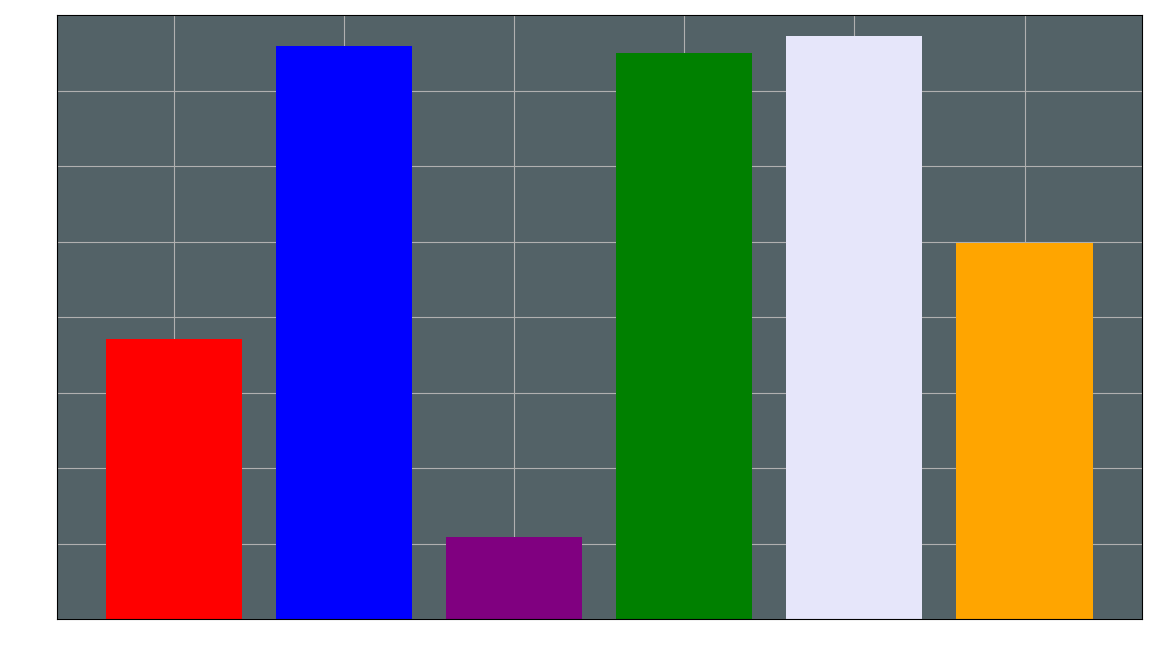

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(figsize=(14,8),dpi=100)
ax.grid()
ax.set_axisbelow(True)
ax.bar(models,scores,color=['red', 'blue', 'purple', 'green', 'lavender','orange'])
ax.set_ylim([0.6, 1])
ax.set_facecolor('xkcd:gunmetal')


In [83]:
## Then our final score:
print('Best r^2 score:',max(scores), 'With the model:',models[np.argmax(scores)])

Best r^2 score: 0.986590413886652 With the model: Xgboost


# 4. Analiz

In [33]:
from xgboost import XGBRegressor 
feature_names = feature_data.columns.tolist()
xgb_model = XGBRegressor(objective ='reg:squarederror', 
                         learning_rate = 0.05 ,min_child_weight= 1, gamma= 0.3,
                         colsample_bytree=0.7 ,max_depth = 5, n_estimators = 500,
                         feature_names=feature_names)
xgb_model.fit(X_train,Y_train)

[15:16:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { feature_names } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7,
             feature_names=['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y',
                            'data_arc', 'n_obs_used', 'H', 'albedo', 'moid',
                            'log(a)', 'log(e)', 'log(i)', 'log(om)', 'log(w)',
                            'log(q)', 'log(ad)', 'log(per_y)', 'log(data_arc)',
                            'log(n_obs_used)', 'log(H)', 'log(albedo)',
                            'log(moid)'],
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosit

<ipython-input-40-f72681f50f3d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


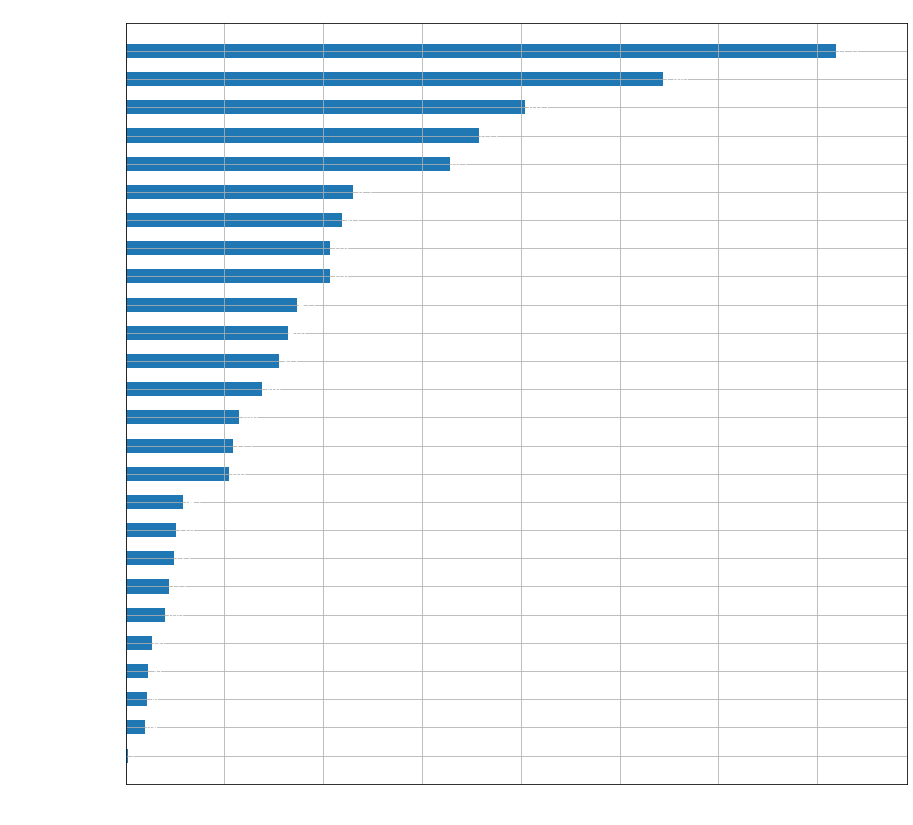

In [40]:
from xgboost import plot_importance
import matplotlib as mpl
import matplotlib.pyplot as plt
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)

fig, ax = plt.subplots(figsize=(14,14))
plot_importance(xgb_model, height=0.5, ax=ax, importance_type='weight')
ax.set_yticklabels(feature_names)
fig.show()

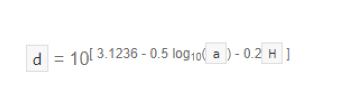

In [39]:
plt.imshow(mpl.image.imread('astroid_diameter_formula.png'))
plt.title('Astreoid diameter formula')
plt.axis('off')
plt.show()